In [16]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/FA4_n2_Time_Series.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/FA4_n2_Time_Series.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 594450 bytes to /content/drive/My Drive/Colab Notebooks/FA4_n2_Time_Series.html


# FA 4

Samson, Justine Aizel D.

# Global Mean Surface Air Temperature Anomaly and Global C02 Concentration

In [11]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Now you can access your Google Drive files using the path '/content/drive/My Drive/'
# For example, to list the files in your Google Drive:
#!ls '/content/drive/My Drive/'

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


# Load the dataset
data_path = "/content/drive/My Drive/CSV files/Global Mean Surface Air Temperature Anomaly and Global CO2 Concentration.xlsx"
data = pd.read_excel(data_path)

# Display the first few rows of the dataset
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Anomaly(C),C02(ppmv)
0,1880,-0.11,290.7
1,1881,-0.13,291.2
2,1882,-0.01,291.7
3,1883,-0.04,292.1
4,1884,-0.42,292.6


**1. Make a time series plot of the data.**

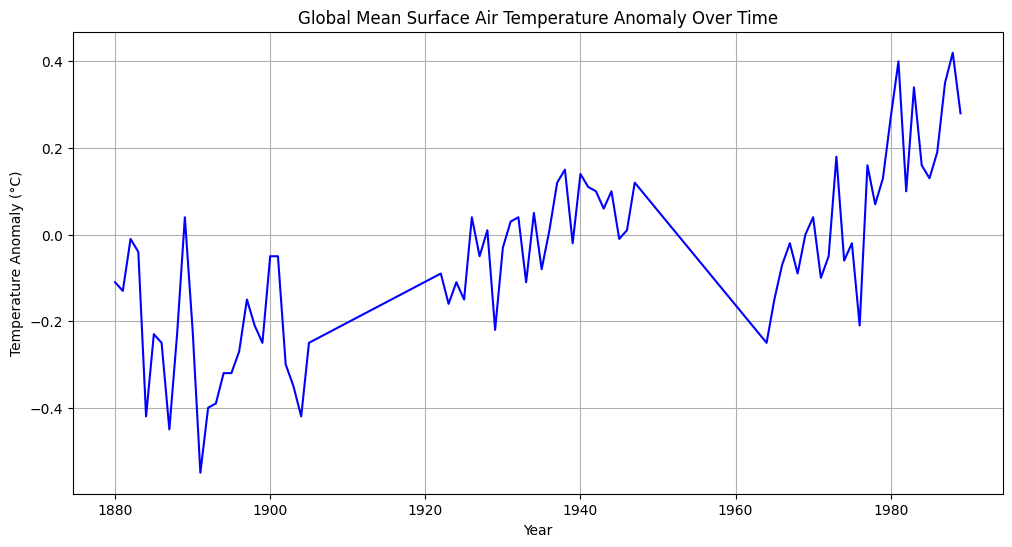

In [12]:
# Set Year as index and select the 'Anomaly(C)' column for analysis
data.set_index('Year', inplace=True)
temperature_anomaly = data['Anomaly(C)']

# 1. Time series plot
plt.figure(figsize=(12, 6))
plt.plot(temperature_anomaly, color='b')
plt.title('Global Mean Surface Air Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid()
plt.show()

**2. Calculate and plot the sample autocorrelation and partial autocorrelation functions.**

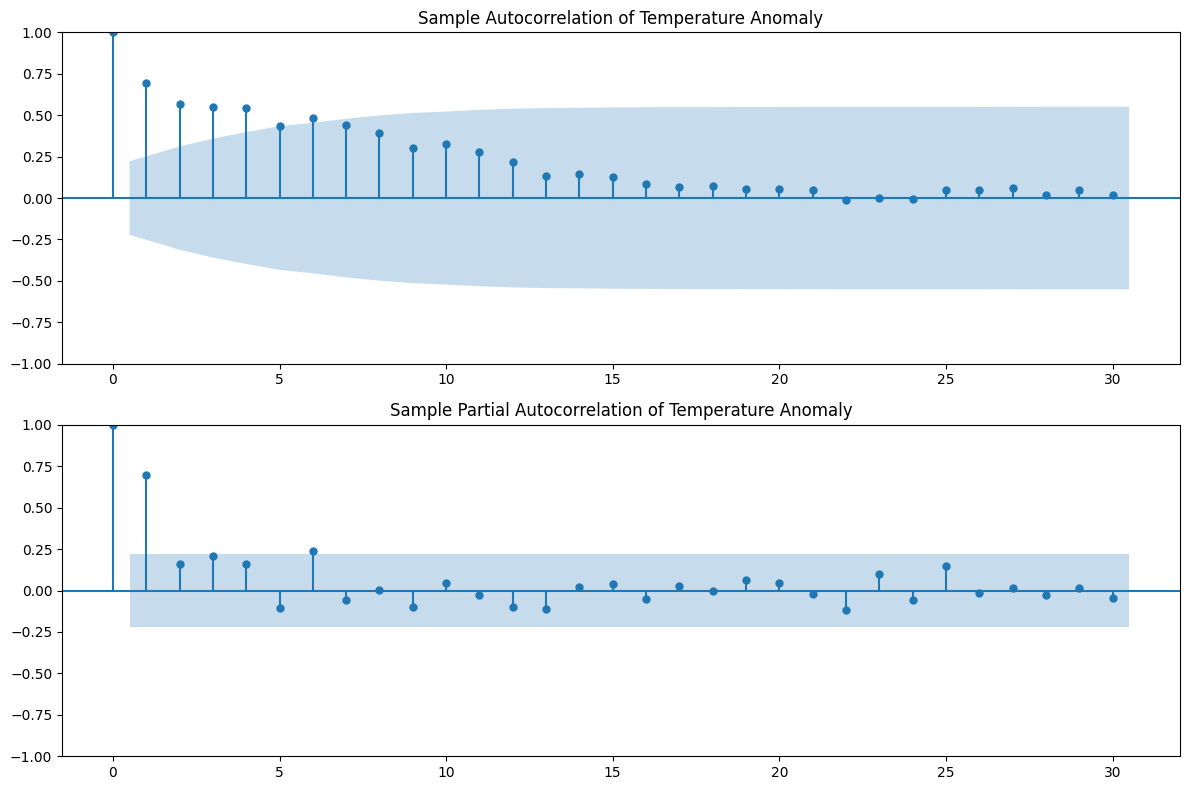

In [13]:
# 2. Calculate and plot ACF and PACF
# Define the temperature anomaly series from the dataset
temperature_anomaly = data['Anomaly(C)']

# Calculate and plot ACF and PACF with adjusted lags
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(temperature_anomaly, ax=ax[0], lags=30)  # Adjusted to 30 lags
ax[0].set_title('Sample Autocorrelation of Temperature Anomaly')
plot_pacf(temperature_anomaly, ax=ax[1], lags=30)  # Adjusted to 30 lags
ax[1].set_title('Sample Partial Autocorrelation of Temperature Anomaly')
plt.tight_layout()
plt.show()


**3. Based on 1, and 2, explain and identify which ARIMA model/s may be appropriate.**


Based on the time series plot and ACF/PACF analysis:


**Time Series Plot (Trend):** There is a slight upward trend in temperature anomalies over time, suggesting that differencing may be necessary to remove the trend and make the series stationary.<br>


**ACF Plot:** The ACF shows a slow decay, which is typical of a non-stationary series. This supports the need for differencing. After differencing, we would expect the ACF to cut off or dampen faster.<br>


**PACF Plot:** The PACF shows a significant spike at lag 1, followed by a quick decay. This pattern suggests an AR component in the model.<br>


Based on these observations, an ARIMA(1,1,0) or ARIMA(1,1,1) model may be appropriate. The differencing order of 1 (d=1) is used to address non-stationarity, and the AR term (1) is based on the PACF.

**4. Fit appropriate ARIMA model to these data and check for model adequacy.**




                               SARIMAX Results                                
Dep. Variable:             Anomaly(C)   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  45.200
Date:                Wed, 13 Nov 2024   AIC                            -84.400
Time:                        07:39:45   BIC                            -77.369
Sample:                             0   HQIC                           -81.587
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1912      0.201      0.953      0.341      -0.202       0.585
ma.L1         -0.7401      0.132     -5.598      0.000      -0.999      -0.481
sigma2         0.0180      0.003      6.542      0.0

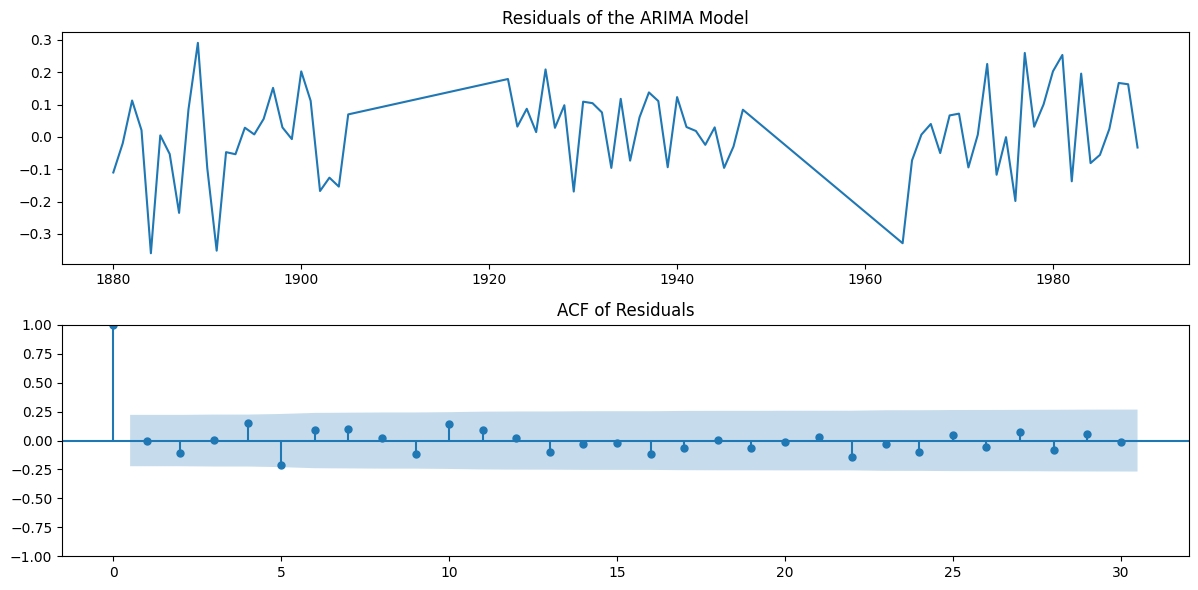

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1) model
model = ARIMA(temperature_anomaly, order=(1, 1, 1))
fit = model.fit()

# Print model summary to check adequacy
print(fit.summary())

# Residuals and diagnostics
residuals = fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')

plt.subplot(2, 1, 2)
plot_acf(residuals, ax=plt.gca(), lags=30)
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()


**Model Summary Interpretation**

The ARIMA(1,1,1) model was fitted to the temperature anomaly data, with the following important points from the summary:

**AR (1) Coefficient:** The autoregressive (AR) coefficient is 0.1912 with a p-value of 0.341, suggesting it is not statistically significant (p > 0.05). This means that the effect of the previous time period’s value on the current one is not strong in this model.

**MA (1) Coefficient:** The moving average (MA) coefficient is -0.7401, which is statistically significant (p < 0.05). This indicates that the model captures some short-term shocks or noise in the data effectively.

**Sigma² (Variance of Residuals):** The sigma² estimate is 0.0180, and it is statistically significant, indicating a certain level of unexplained variance (random noise) in the model.

**The Akaike Information Criterion (AIC)** is -84.4, and the Bayesian Information Criterion (BIC) is -77.369. Lower AIC and BIC values indicate a better model fit, but in absolute terms, these values serve as a reference rather than conclusive evidence of model adequacy.

**The Ljung-Box Q test (L1 Q statistic)** is very low with a high p-value of 0.96, suggesting that there is no significant autocorrelation left in the residuals at lag 1, implying that the model is adequately capturing the patterns in the data at that level.

**Residual Plot:**

* The plot of the residuals shows fluctuations around zero, which is typical for a good model fit, as residuals should ideally have a mean of zero.

* However, there is noticeable variation in the amplitude of the residuals over time, which could indicate non-constant variance or some remaining structure. The absence of clear patterns is positive but could be checked further for heteroscedasticity if needed.

**Autocorrelation Function (ACF) of Residuals:**

* The ACF plot shows the autocorrelations of residuals at different lags. Most values fall within the 95% confidence bands, suggesting that there is no significant autocorrelation in the residuals. This indicates that the ARIMA model has successfully removed most of the autocorrelation present in the original data.

* The absence of significant spikes in the ACF plot supports the Ljung-Box Q test results, which imply that residuals are close to white noise and that the model has adequately captured the serial dependencies in the data.

**5. Make one-step-ahead forecasts of the last 10 observations and determine the forecast errors.**

Forecasted Values:
 Year
1980    0.277568
1981    0.277103
1982    0.277014
1983    0.276997
1984    0.276994
1985    0.276993
1986    0.276993
1987    0.276993
1988    0.276993
1989    0.276993
dtype: float64
Actual Values:
 Year
1980    0.27
1981    0.40
1982    0.10
1983    0.34
1984    0.16
1985    0.13
1986    0.19
1987    0.35
1988    0.42
1989    0.28
Name: Anomaly(C), dtype: float64
Forecast Errors:
 Year
1980   -0.007568
1981    0.122897
1982   -0.177014
1983    0.063003
1984   -0.116994
1985   -0.146993
1986   -0.086993
1987    0.073007
1988    0.143007
1989    0.003007
dtype: float64


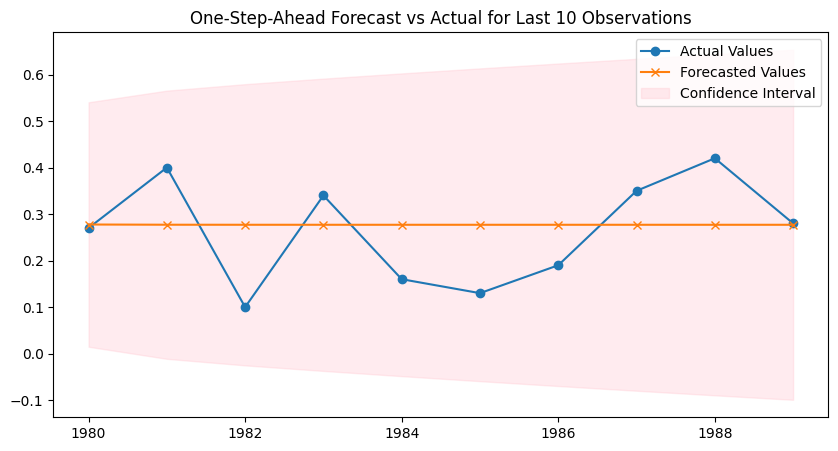

In [15]:
# One-step-ahead forecast for the last 10 observations
forecast = fit.get_forecast(steps=10)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Extract actual last 10 observations
actual_values = temperature_anomaly[-10:]

# Convert forecasted values to a Series with the same index as actual_values
forecasted_values = pd.Series(forecast_values.values, index=actual_values.index)

# Calculate forecast errors by subtracting forecasted from actual values
forecast_errors = actual_values - forecasted_values

# Print results
print("Forecasted Values:\n", forecasted_values)
print("Actual Values:\n", actual_values)
print("Forecast Errors:\n", forecast_errors)

# Plot forecast vs actual values
plt.figure(figsize=(10, 5))
plt.plot(actual_values.index, actual_values, label="Actual Values", marker='o')
plt.plot(actual_values.index, forecasted_values, label="Forecasted Values", marker='x')
plt.fill_between(actual_values.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("One-Step-Ahead Forecast vs Actual for Last 10 Observations")
plt.show()


# Analysis of the Forecast
**Forecasted vs. Actual Values:**

* The forecasted values for the last 10 observations are fairly stable, remaining around 0.277. This is evident from the horizontal line representing the forecasted values on the plot.

* In contrast, the actual temperature anomaly values fluctuate considerably, ranging from a low of 0.10 (in 1982) to a high of 0.42 (in 1988). These fluctuations are captured by the blue line representing actual values.


**Forecast Errors:**

* The forecast errors (difference between actual and forecasted values) indicate that the model consistently underestimates or overestimates the actual values depending on the year. For instance:
  * In 1982, the model significantly overestimated the actual anomaly (forecast error of -0.177).
  * In 1988, it underestimated the actual anomaly by 0.143.
The magnitude of errors suggests that the model struggles to capture the year-to-year variability in the temperature anomaly data.

**Confidence Interval:**

* The pink-shaded area in the plot represents the 95% confidence interval for the forecasts.

* Despite the wide confidence intervals, they do not fully encompass the range of actual values. Some actual observations fall outside the predicted range, particularly in years with significant deviations from the forecasted mean.

* This indicates that the model’s confidence intervals are not broad enough to capture the true variability of the temperature anomalies in recent years, suggesting potential issues with model specification.